In [1]:
import pandas as pd
import qeds
%matplotlib inline
# activate plot theme
import qeds

from IPython.display import display

In [33]:
data_airbnb = pd.read_csv('listings.csv')
data_airbnb.head()
#Property Type: Different types of properties like apartments, houses, or condos may have different prices.
#Room Type: Private or shared rooms can affect the price of a listing.
#Location: Neighborhood or proximity to popular attractions can impact the price.
#Number of Guests Allowed: Accommodating more guests can result in a higher price.
#Amenities: Availability of extra amenities like a pool, kitchen, or parking can affect the price of a listing.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


C:\Users\Alienware\AppData\Local\Temp\ipykernel_13752\1489913029.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','').str.replace(',','', regex=True).astype(float)


<AxesSubplot:xlabel='beds'>

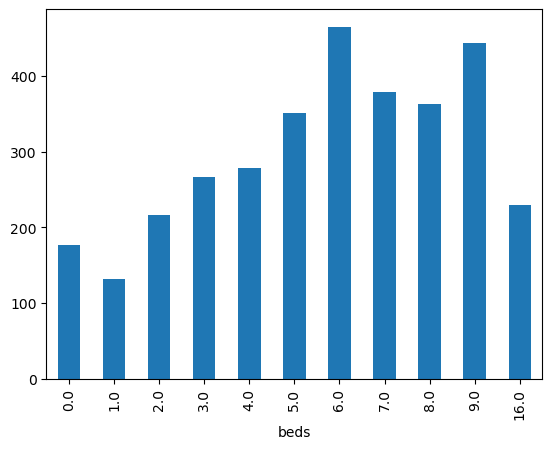

In [45]:
df = pd.read_csv('listings.csv').dropna(subset=['price', 'beds']).copy()
# Remove the $
df['price'] = df['price'].str.replace('$','').str.replace(',','').astype(float)
# Group the data by the number of beds and calculate the mean price for each group
grouped = df.groupby(['beds'])['price'].mean().sort_index()
# Create a bar plot of the mean price by the number of beds
grouped.plot(kind='bar')